# Dairy Goods Sales

In [1]:
# Dairy Goods Sales
# from the dataset mentioned above, find the answers of these few questions 
#1. does number of cows in a farm has any dependency on area aquired. 
#2. what is the average expiry days of each product. 
#3. mention the name of the products with max and min shelf life
#4. summarize the data on the basis of brands and land acquired by them,cows and the revenue generated by them. 
#5. What is the average shelf life for different storage conditions.



In [2]:
import pandas as pd
df=pd.read_csv("dairy_dataset.csv")
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,17-02-2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,27-12-2021,21-01-2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,01-12-2021,1,Milk,Amul,687.48,42.61,...,03-10-2021,25-10-2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,28-02-2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,14-01-2022,13-02-2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,09-06-2019,3,Cheese,Britannia Industries,823.36,26.52,...,15-05-2019,26-07-2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,14-12-2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,17-10-2020,28-10-2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

# Cows Dependency

In [12]:
#1. does number of cows in a farm has any dependency on area aquired.
#ans- No, it does not depend on area as we can see average number of cows is equal to any size of Farm either it is large,medium and small.

gb_area=df.groupby("Farm Size").agg({"Number of Cows":"mean"})
gb_area            

,Number of Cows
Farm Size,
Large,55.428865
Medium,55.102154
Small,54.346208


# Average Expiry Date

In [13]:
#2. what is the average expiry days of each product.

gb_expiry=df.groupby("Product ID").agg({"Shelf Life (days)":"mean"})
gb_expiry

,Shelf Life (days)
Product ID,
1,12.923077
2,32.932715
3,57.324190
4,25.517162
5,25.458629
6,6.025052
7,14.847875
8,10.572414
9,10.662132


In [16]:
expiry= df.groupby("Product Name").agg({"Shelf Life (days)":"mean"})
expiry

,Shelf Life (days)
Product Name,
Butter,32.932715
Buttermilk,10.572414
Cheese,57.324190
Curd,6.025052
Ghee,105.741294
Ice Cream,25.458629
Lassi,14.847875
Milk,12.923077
Paneer,10.662132


# Min And Max Shelf Life

In [26]:
#3. mention the name of the products with max and min shelf life

max_shelf = expiry.idxmax()
print("max",max_shelf)

min_shelf = expiry.idxmin()
print("min",min_shelf)

max Shelf Life (days)    Ghee
dtype: object
min Shelf Life (days)    Curd
dtype: object


In [8]:
import pandas as pd
df=pd.read_csv("dairy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

# brands and Total Land Acquired

In [27]:
#4. summarize the data on the basis of brands and land acquired by them,

gb_summery=df.groupby("Brand").agg({
    "Total Land Area (acres)":"sum",
    "Number of Cows":"sum",
    "Approx. Total Revenue(INR)":"sum"
})
gb_summery

,Total Land Area (acres),Number of Cows,Approx. Total Revenue(INR)
Brand,,,
Amul,528377.46,56873,14608864.46
Britannia Industries,51221.94,4968,1029522.05
Dodla Dairy,111974.65,12354,2604857.37
Dynamix Dairies,55356.87,5637,1479884.78
Mother Dairy,497118.15,56517,13766786.47
Palle2patnam,106237.70,11705,2528989.12
Parag Milk Foods,53690.47,5204,1516697.71
Passion Cheese,50724.93,5353,1498653.15
Raj,346073.91,36957,9560777.64


# Average Shelf Life For Different Storage Conditions

In [57]:
#5. What is the average shelf life for different storage conditions.

gb_storage=df.groupby("Storage Condition").agg({"Shelf Life (days)":"mean"})
gb_storage



,Shelf Life (days)
Storage Condition,
Ambient,105.741294
Frozen,32.508213
Polythene Packet,1.471111
Refrigerated,18.006913
Tetra Pack,25.553922


In [58]:
storage_max = gb_storage.idxmax()
print(f"This Storage Condition have Maximum {storage_max}")

storage_min = gb_storage.idxmin()
print(f"This Storage Condition have Minimum {storage_min}")

#we conclude that Ambient storage condition is very good and Polythene Packet is very lood shelf life 

This Storage Condition have Maximum Shelf Life (days)    Ambient
dtype: object
This Storage Condition have Minimum Shelf Life (days)    Polythene Packet
dtype: object


#  Highest Sales Volume Product

In [29]:
#Which product has the highest sales volume? What is the revenue generated from this product?

sales_volume=df.groupby("Product Name")["Quantity Sold (liters/kg)"].sum()

max_product = sales_volume.idxmax()
revenue = df[df["Product Name"] == max_product]["Approx. Total Revenue(INR)"].sum()

print("Products With High Sales Volume : ",max_product)
print("Revenue Generate From This Products : ",revenue)

Products With High Sales Volume :  Curd
Revenue Generate From This Products :  6743880.7299999995


# Total Stock For Each Product

In [30]:
#How much stock do you currently have for each product?

stock= df.groupby("Product Name").agg({"Quantity in Stock (liters/kg)":"sum"})
stock

,Quantity in Stock (liters/kg)
Product Name,
Butter,115784
Buttermilk,110789
Cheese,102112
Curd,133525
Ghee,97858
Ice Cream,103629
Lassi,113385
Milk,105187
Paneer,102438


# Total Revenue Generated

In [46]:
#What is the total revenue generated from the sales of all products

print("Total Revenue : ",df["Approx. Total Revenue(INR)"].sum())


Total Revenue :  58734647.86000001


# Total Land Area Acquired By Different Locations

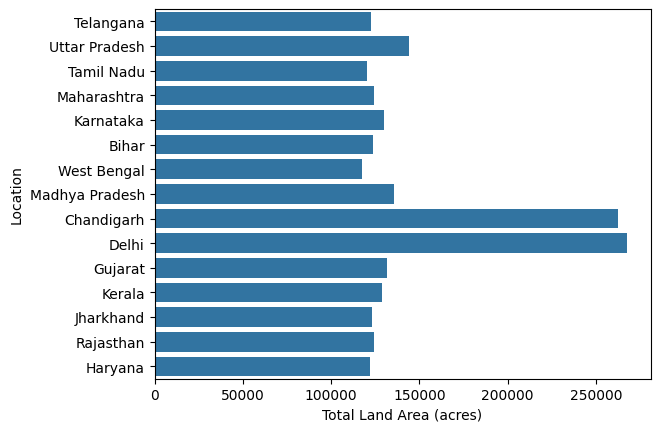

In [50]:
#How does the 'Total Land Area' vary across different locations?Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = df, x = "Total Land Area (acres)", y = "Location",estimator="sum",errorbar=('ci', 0))

plt.show()

# Approx. Total Revenue Distribution From Different Sales Channels

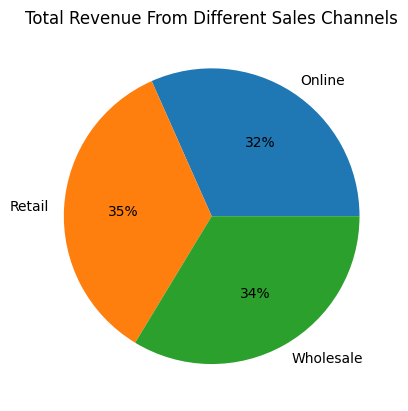

In [53]:
#What is the distribution of 'Approx. Total Revenue' across different sales channels?

sales_ch=df.groupby("Sales Channel").agg({"Approx. Total Revenue(INR)":"mean"})

plt.pie(sales_ch["Approx. Total Revenue(INR)"],labels=sales_ch.index, autopct="%1.0f%%")
plt.title("Total Revenue From Different Sales Channels")
plt.show()